In [1]:
import pandas as pd
import numpy as np
from sklearn import *

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

data = data.drop(data[data['GrLivArea'] > 4500].index)

#applying log transformation
data['SalePrice'] = np.log(data['SalePrice'])

#data transformation
data['GrLivArea'] = np.log(data['GrLivArea'])

#if area>0 it gets 1, for area==0 it gets 0
data['HasBsmt'] = pd.Series(len(data['TotalBsmtSF']), index=data.index)
data['HasBsmt'] = 0 
data.loc[data['TotalBsmtSF']>0,'HasBsmt'] = 1

#transform data
data.loc[data['HasBsmt']==1,'TotalBsmtSF'] = np.log(data['TotalBsmtSF'])

C:\Users\calla\Anaconda3\envs\pyMain\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
features = data.iloc[:,0:80]  #independent columns
target = data['SalePrice']

In [4]:
imp_feat = ['OverallQual', 'GrLivArea', 'GarageCars','YearBuilt', 'TotalBsmtSF', 'FullBath']
best_features = features[imp_feat]

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(best_features, target, test_size = .3)

In [6]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import math

# fit a model
lm = tree.DecisionTreeRegressor()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

scores = cross_val_score(model, X_train, y_train, cv=6)
print('Cross-validated scores:', scores)
print("Standard Error: ", math.sqrt(metrics.mean_squared_error(y_test, predictions)))

Cross-validated scores: [0.69882835 0.707551   0.71171189 0.70669241 0.69089356 0.68151554]
Standard Error:  0.19814102889821136


Score: 0.015429769659855654


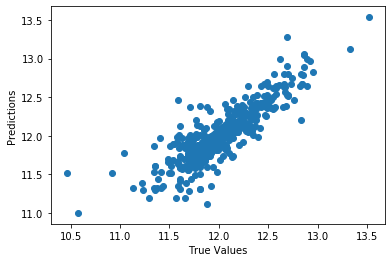

In [7]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('Score:', np.sqrt(metrics.mean_squared_log_error(predictions, y_test)))

In [8]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [70, 80, 90],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10, 12, 14],
    'n_estimators': [25, 50, 75],
    'learning_rate':[.05, .1, .15]
}

# Create a based model
rf = ensemble.GradientBoostingRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [9]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 1970 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 2180 out of 2187 | elapsed:  1.0min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2187 out of 2187 | elapsed:  1.1min finished


In [1]:
pred = best_grid.predict(X_test)

## The line / model
plt.scatter(np.exp(y_test), np.exp(pred))
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('Score:', np.sqrt(metrics.mean_squared_log_error(np.exp(pred), np.exp(y_test))))

NameError: name 'best_grid' is not defined

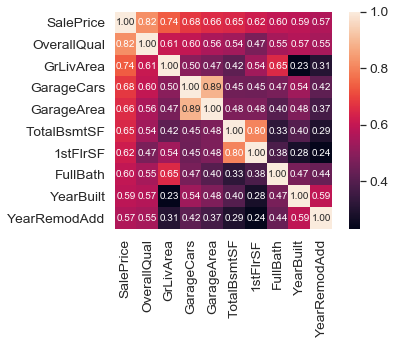

In [16]:
corrmat = data.corr()
#saleprice correlation matrix

k = 10 #number of variables for heatmap

cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(data[cols].values.T)

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Submissions

In [56]:
df_test = pd.read_csv("test.csv")

In [57]:
#data transformation
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

#if area>0 it gets 1, for area==0 it gets 0
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
df_test['HasBsmt'] = 0 
df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1

#transform data
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

C:\Users\calla\Anaconda3\envs\pyMain\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [64]:
imp_feat = ['OverallQual', 'GrLivArea', 'GarageCars','YearBuilt', 'TotalBsmtSF', 'FullBath']
X = df_test[imp_feat]
X = X.fillna(X.mean())

In [65]:
test_predictions = np.exp(best_grid.predict(X))

In [67]:
df = {'Id':df_test['Id'], 'SalePrice':test_predictions}
sub = pd.DataFrame(df)

In [70]:
sub.to_csv('submission.csv', index=False)